In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize

In [5]:
texts = "Please rate the product names based on their catchiness, uniqueness, and simplicity. Rate them on a scale from 1-5, with 5 being the highest score. Respond only with a table containing the results."

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sangram.samanta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sangram.samanta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
words = word_tokenize(texts.lower())

In [14]:
corpus = [
     'This is the first document.',
     'This is the second second document.',
     'And the third one.',
     'is this the first document?'
]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vect = CountVectorizer()

In [17]:
a = vect.fit_transform(corpus)

In [18]:
a.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [19]:
counts = pd.DataFrame(a.toarray(), columns=vect.get_feature_names_out())

In [20]:
counts

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,1,0,1,0,2,1,0,1
2,1,0,0,0,1,0,1,1,0
3,0,1,1,1,0,0,1,0,1


In [23]:
import cv2

In [24]:
image_file = "NotebookLM Mind Map.png"
img = cv2.imread(image_file)
print("Dimention of the image: ", img.shape)

Dimention of the image:  (18386, 7216, 3)


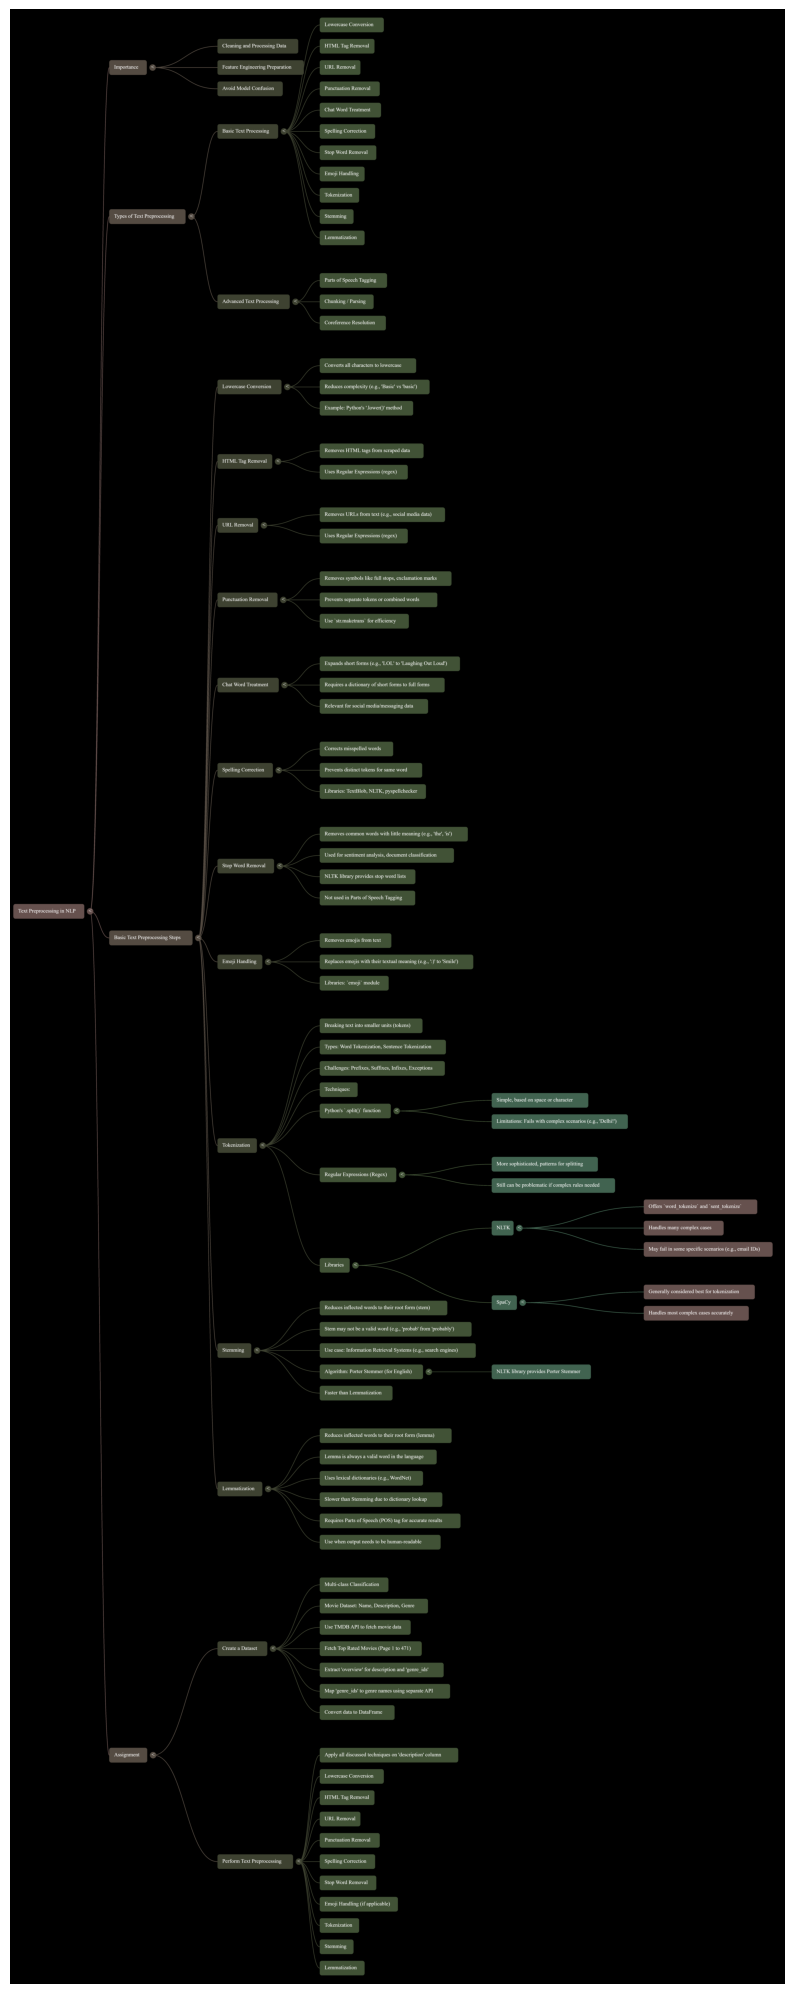

In [25]:
plt.figure(figsize=(10, 100))
plt.imshow(img)
plt.axis(False)
plt.show()

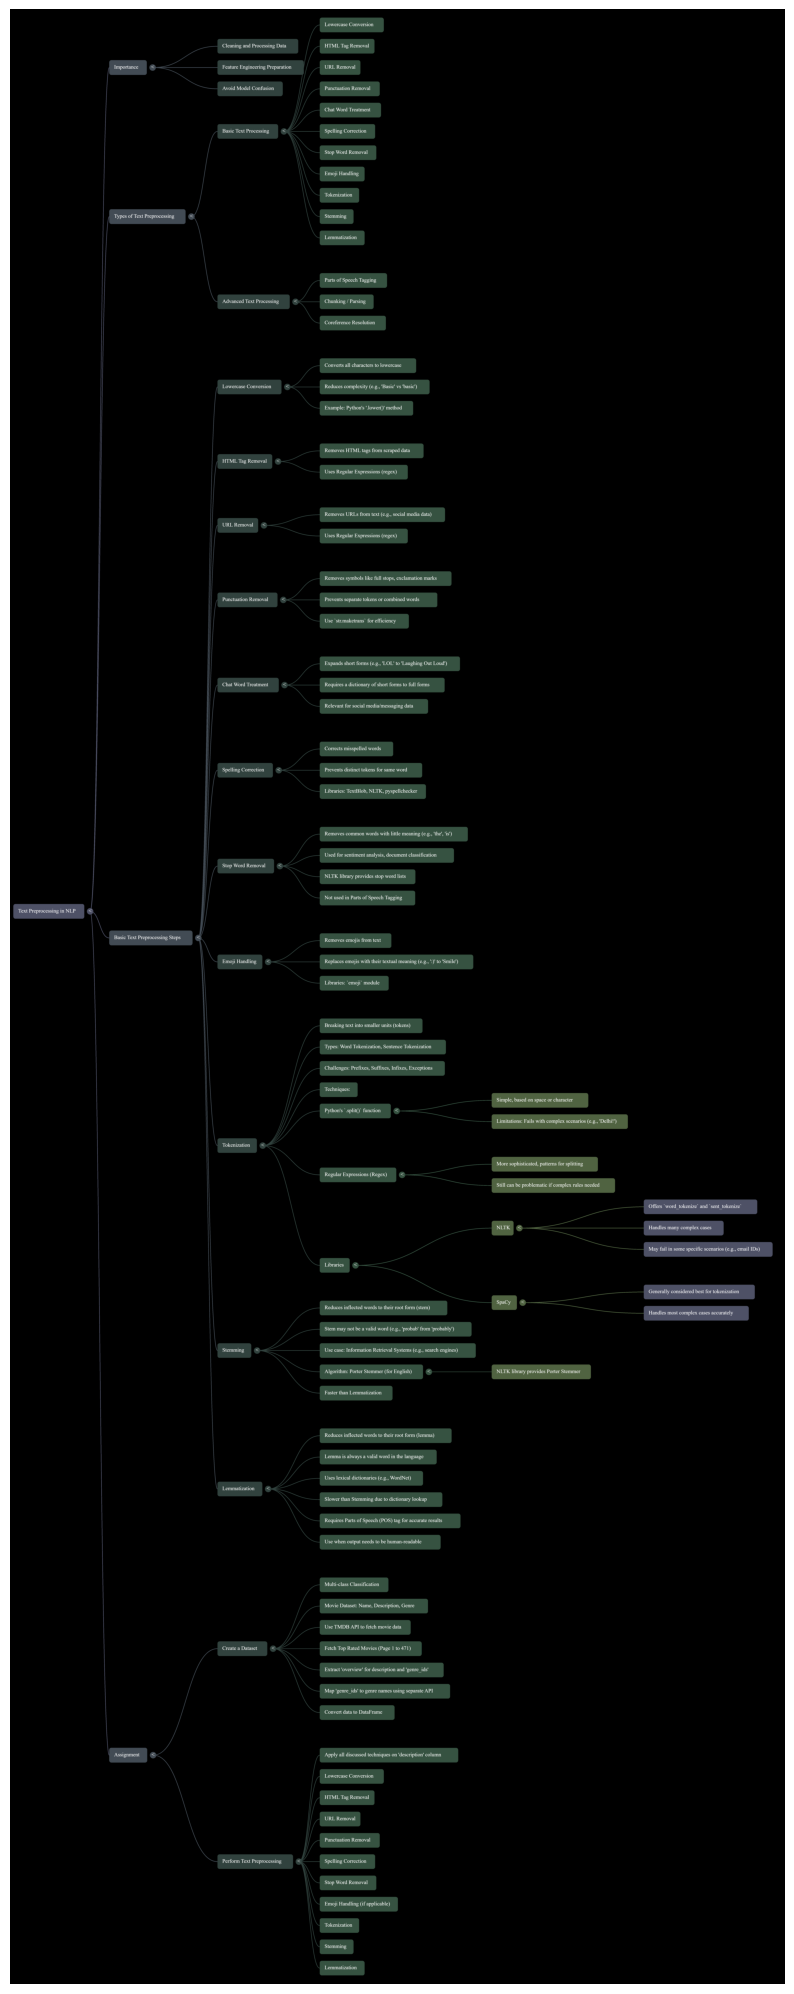

In [29]:
# by default the library read in BGR format but we need to conver that into RGB format 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,100))
plt.imshow(img)
plt.axis(False)
plt.show()


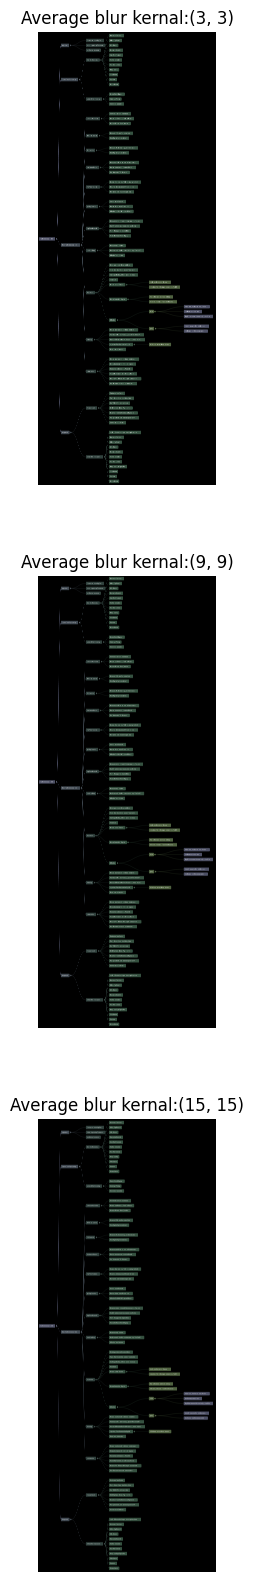

In [33]:
fig, ax = plt.subplots(3, 1, figsize = (20, 20))
kernal_size = [(3, 3), (9,9), (15,15)]
for idx, kernal in enumerate(kernal_size):
    # Applying blurring
    img1 = cv2.blur(img, kernal)
    ax[idx].set_title(f'Average blur kernal:{kernal}')
    ax[idx].imshow(img1, cmap='gray')
    ax[idx].axis(False)

# plt.tight_layout(True)
plt.show()

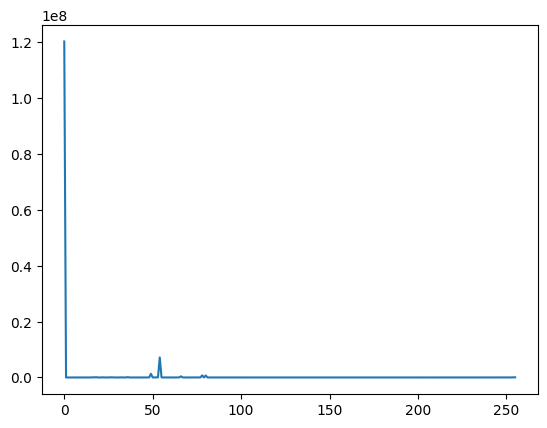

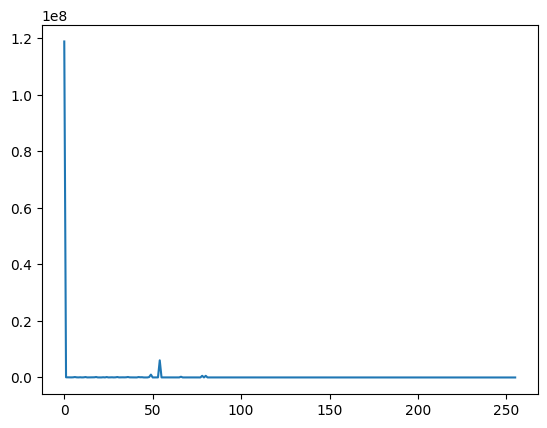

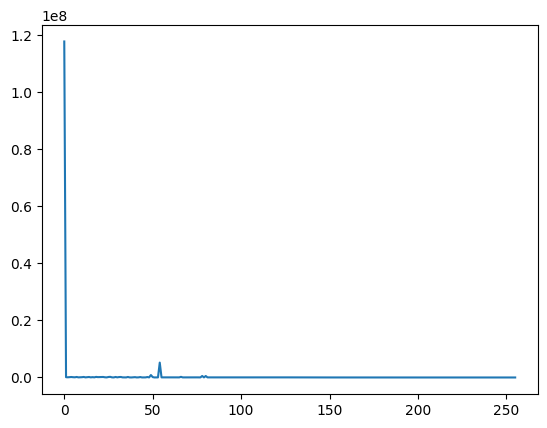

In [34]:
for idx, kernal in enumerate(kernal_size):
    img2 = cv2.blur(img, kernal)
    # find frequenccy of pixels in range 0-255
    hisr = cv2.calcHist([img2], [0], None, [256], [0, 256])
    # show the plotting graph of an image
    plt.plot(hisr)
    plt.show()

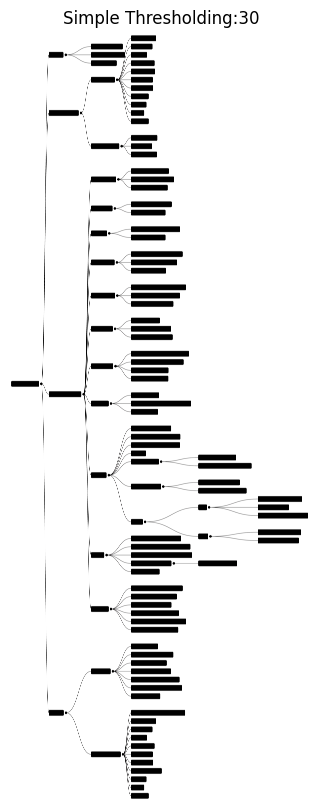

In [35]:
_, thresh_image = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.title(f"Simple Thresholding:{30}")
# simple threshold 
plt.imshow(thresh_image, cmap='gray')
plt.axis(False)
plt.show()


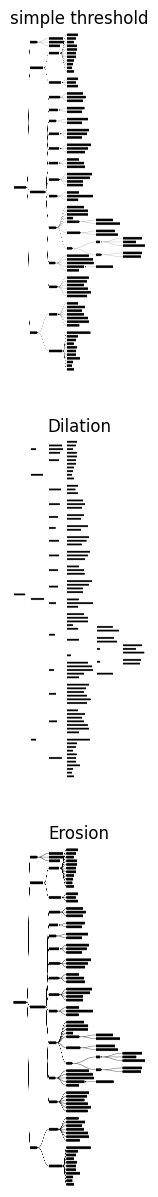

In [37]:
# morphological operation
fix, ax = plt.subplots(3, 1, figsize=(20,15))
erode = cv2.erode(thresh_image, None, iterations=5)
dilate = cv2.dilate(thresh_image, None, iterations=20)
ax[0].set_title(f"simple threshold")
ax[1].set_title(f"Dilation")
ax[2].set_title(f"Erosion")

# simple Threshold
ax[0].imshow(thresh_image)
ax[0].axis(False)

# Dilation
ax[1].imshow(dilate, cmap='gray')
ax[1].axis(False)
# Erosion
ax[2].imshow(erode)
ax[2].axis(False)

# plt.tight_layout
plt.show()